In [1]:
import pandas as pd

df_data = pd.read_pickle('_data/PETA/peta.pkl')

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
tfms = get_transforms(do_flip=True,
                      flip_vert=False,
                      max_rotate=5.0,
                      max_zoom=1.1,
                      max_lighting=0.3,
                      max_warp=0.2,
                      p_affine=0.75,
                      p_lighting=0.75)

# Training size 64 x 32

In [4]:
data = (ImageList.from_df(df_data, '/')          # Where to find the data
                 .split_by_rand_pct(seed=15)  # Randomly split train/valid
                 .label_from_df(cols='label')  # How to label the train and validation set.
                 .transform(tfms, size=(64,32))   # Data augmentation
                 .databunch(bs=64))

In [5]:
TMP_PATH = "."
MODEL_PATH = "."

learner = cnn_learner(data,
                      models.resnet101,
                      path=TMP_PATH,
                      model_dir=MODEL_PATH,
                      metrics=[accuracy])

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.torch/models/resnet101-5d3b4d8f.pth
100%|██████████| 178728960/178728960 [00:29<00:00, 6035049.33it/s] 


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


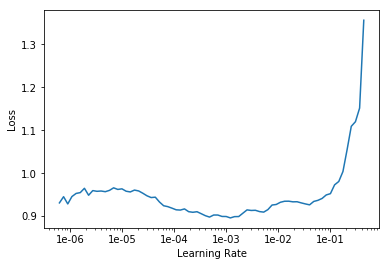

In [6]:
learner.lr_find()
learner.recorder.plot()

In [7]:
lr = 1e-3
learner.fit_one_cycle(30, slice(lr))

In [8]:
learner.save('_etc/stage-1_rn100_30epoch_64x32')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


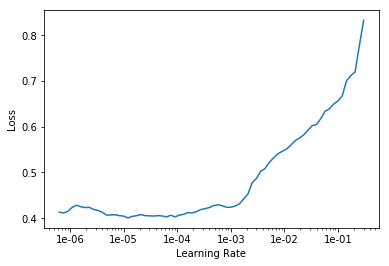

In [9]:
learner.load('_etc/stage-1_rn100_30epoch_64x32')
learner.unfreeze()
learner.lr_find()
learner.recorder.plot()

In [10]:
learner.fit_one_cycle(30, slice(1e-5, lr/10))

In [11]:
learner.save('_etc/stage-2_rn101_30epoch_64x32')

# Training size 128 x 64

In [12]:
data = (ImageList.from_df(df_data, '/')          # Where to find the data
                 .split_by_rand_pct(seed=15)  # Randomly split train/valid
                 .label_from_df(cols='label')  # How to label the train and validation set.
                 .transform(tfms, size=(128, 64))   # Data augmentation
                 .databunch(bs=64))

In [13]:
learner.data = data

In [14]:
learner.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


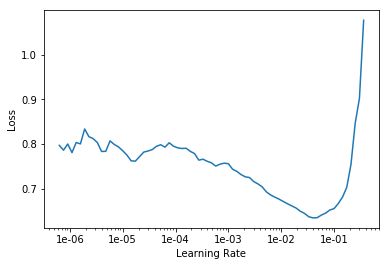

In [15]:
learner.lr_find()
learner.recorder.plot()

In [ ]:
lr=5e-2

In [ ]:
learner.fit_one_cycle(30, slice(lr))

In [ ]:
learner.save('_etc/stage-1_rn50_30epoch_128x64')

In [ ]:
learner.load('_etc/stage-1_rn50_30epoch_128x64')

In [ ]:
learner.unfreeze()
learner.lr_find()
learner.recorder.plot()

In [ ]:
learner.fit_one_cycle(50, slice(1e-6, lr/10))

In [ ]:
learner.save('_etc/stage-2_rn50_50epoch_128x64')

In [ ]:
interp = learner.interpret()

In [ ]:
interp.plot_top_losses(k=16)

In [ ]:
interp.confusion_matrix()

In [ ]:
torch.save(learner.model, '_etc/stage-2_rn50_30epoch_128x64.pth')